In [1]:
from sympy import symbols, init_printing, exp, log, diff, simplify, limit
import numpy as np

In [2]:
x,y,u,v, y_hev = symbols('x y u v y_hev ')
c1,π, ν,t =symbols('c1 π ν t', positive=True)
k_s, u_star, u_log_max,r, hev ,u_log= symbols('k_s u_star  u_log_max r hev u_log', positive=True)
init_printing(use_unicode=True)

In [3]:
#y_hev = y - hev

u = c1*(y-hev)/(2*π*(x**2+(y-hev)**2))*(1 - exp(-(x**2+(y-hev)**2)/(4*ν*t))) * (2.5*log(y/k_s) + 8.5) * u_star/u_log_max + (2.5*log(y/k_s) + 8.5) * u_star
v = c1*(- x)  /(2*π*(x**2+(y-hev)**2))*(1 - exp(-(x**2+(y-hev)**2)/(4*ν*t))) * (2.5*log(y/k_s) + 8.5) * u_star/u_log_max

In [4]:
e_ledd, em1_ledd, r_sq, du_constant1 = symbols('e_ledd em1_ledd r_sq du_constant1', positive=True)
byt_ut = [(y-hev, y_hev),((x**2+y_hev**2),r),(exp((-r)/(4*t*ν)),e_ledd),(1-e_ledd,em1_ledd),
          ((1 - exp((-x**2 - y_hev**2)/(4*t*ν))),em1_ledd),(1/(4*t*ν*π*r**2),du_constant1),((2.5*log(y/k_s) + 8.5),u_log/u_star)]
#byt_ut = [((2.5*log(y/k_s) + 8.5),u_log)]
print("u = ",u.subs(byt_ut))
print("v = ",v.subs(byt_ut))
print(" ")

print("dudx =",simplify(diff(u,x)).subs(byt_ut))
print("dudy =",simplify(diff(u,y)).subs(byt_ut))
print("dvdx =",simplify(diff(v,x)).subs(byt_ut))
print("dvdy =",simplify(diff(v,y)).subs(byt_ut))
print("dudt =",simplify(diff(u.subs([(t,50)]),t)))
print("dvdt =",simplify(diff(v.subs([(t,50)]),t)))

u =  c1*em1_ledd*u_log*y_hev/(2*r*u_log_max*π) + u_log
v =  -c1*em1_ledd*u_log*x/(2*r*u_log_max*π)
 
dudx = -c1*du_constant1*u_log*x*y_hev*(-e_ledd*r + 4*em1_ledd*t*ν)/u_log_max
dudy = du_constant1*u_star*(c1*e_ledd*r*u_log*y*y_hev**2/u_star + 2*c1*em1_ledd*r*t*u_log*y*ν/u_star + 5.0*c1*em1_ledd*r*t*y_hev*ν - 4*c1*em1_ledd*t*u_log*y*y_hev**2*ν/u_star + 10.0*r**2*t*u_log_max*ν*π)/(u_log_max*y)
dvdx = c1*du_constant1*u_log*(-e_ledd*r*x**2 - 2*em1_ledd*r*t*ν + 4*em1_ledd*t*x**2*ν)/u_log_max
dvdy = c1*du_constant1*u_star*x*(-e_ledd*r*u_log*y*y_hev/u_star - 5.0*em1_ledd*r*t*ν + 4*em1_ledd*t*u_log*y*y_hev*ν/u_star)/(u_log_max*y)
dudt = 0
dvdt = 0


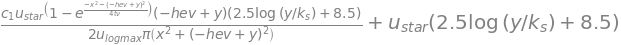

In [13]:
u

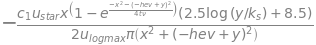

In [5]:
v

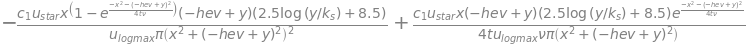

In [6]:
diff(u,x)

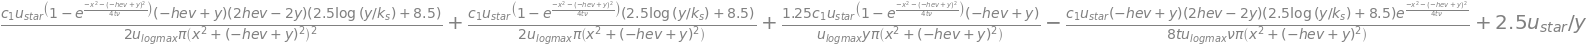

In [7]:
diff(u,y)

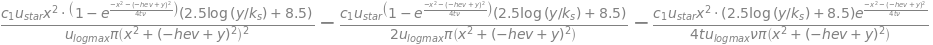

In [8]:
diff(v,x)

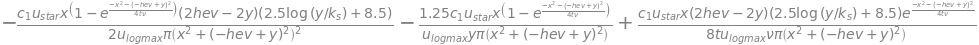

In [9]:
diff(v,y)

In [10]:

print(diff((2.5*log(y/k_s) + 8.5) * u_star,x))
print(diff((2.5*log(y/k_s) + 8.5) * u_star,y))


0
2.5*u_star/y


In [11]:
limit(simplify(diff(c1/(2*π*r) * (1 - exp( -r**2/(4* ν *t))),r)),t,0)

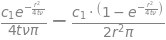

In [12]:
diff(c1/(2*π*r) * (1 - exp( -r**2/(4* ν *t))),r)